In [18]:
import pandas as pd

# Read the data from Excel
data = pd.read_csv('DASS data.csv')

# List of irrelevant attributes to remove
irrelevant_attributes = [
    'introelapse', 'testelapse', 'surveyelapse',
    'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
    'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16',
    'screensize', 'uniquenetworklocation', 'source',
    'Q1E', 'Q2E', 'Q3E', 'Q4E', 'Q5E', 'Q6E', 'Q7E', 'Q8E', 'Q9E', 'Q10E',
    'Q11E', 'Q12E', 'Q13E', 'Q14E', 'Q15E', 'Q16E', 'Q17E', 'Q18E', 'Q19E', 'Q20E',
    'Q21E', 'Q22E', 'Q23E', 'Q24E', 'Q25E', 'Q26E', 'Q27E', 'Q28E', 'Q29E', 'Q30E',
    'Q31E', 'Q32E', 'Q33E', 'Q34E', 'Q35E', 'Q36E', 'Q37E', 'Q38E', 'Q39E', 'Q40E',
    'Q41E', 'Q42E',
    'Q1I', 'Q2I', 'Q3I', 'Q4I', 'Q5I', 'Q6I', 'Q7I', 'Q8I', 'Q9I', 'Q10I',
    'Q11I', 'Q12I', 'Q13I', 'Q14I', 'Q15I', 'Q16I', 'Q17I', 'Q18I', 'Q19I', 'Q20I',
    'Q21I', 'Q22I', 'Q23I', 'Q24I', 'Q25I', 'Q26I', 'Q27I', 'Q28I', 'Q29I', 'Q30I',
    'Q31I', 'Q32I', 'Q33I', 'Q34I', 'Q35I', 'Q36I', 'Q37I', 'Q38I', 'Q39I', 'Q40I',
    'Q41I', 'Q42I'
]

# Remove irrelevant attributes from the data
data = data.drop(columns=irrelevant_attributes)

# Save the sanitized data back to Excel
data.to_csv('sanitized_data.csv', index=False)


In [20]:
# read the sanitised CSV file
data = pd.read_csv('sanitized_data.csv')

# Calculate the sum of values from Q1A to Q42A
row_sums = data.loc[:, 'Q1A':'Q42A'].sum(axis=1)

# Insert a new column with the calculated sums after the 'Q42A' column
data.insert(data.columns.get_loc('Q42A') + 1, 'RowSums', row_sums)

# Save the modified data to a new CSV file
data.to_csv('modified_data.csv', index=False)

In [25]:
# Read the modified CSV file with 'RowSums' column
data = pd.read_csv('modified_data.csv')

# Sort the dataframe by 'RowSums' column in descending order and select the top 10,000 rows
top_rows = data.sort_values(by='RowSums', ascending=False).head(10000)

# Save the top 10,000 rows to a new CSV file
top_rows.to_csv('top_rows.csv', index=False)

In [26]:
# Read the top_rows CSV file
data = pd.read_csv('top_rows.csv')

# Select the columns from Q1A to Q42A
selected_columns = data.loc[:, 'Q1A':'Q42A']

# Calculate the mean of each column
column_means = selected_columns.mean()

# Create a new row with the calculated means
mean_row = pd.DataFrame(column_means).transpose()

# Concatenate the mean row with the original dataframe
data_with_mean = pd.concat([data, mean_row])

# Save the dataframe with the mean row to a new CSV file
data_with_mean.to_csv('data_with_mean.csv', index=False)


<ipython-input-1-279eefb186cd>:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


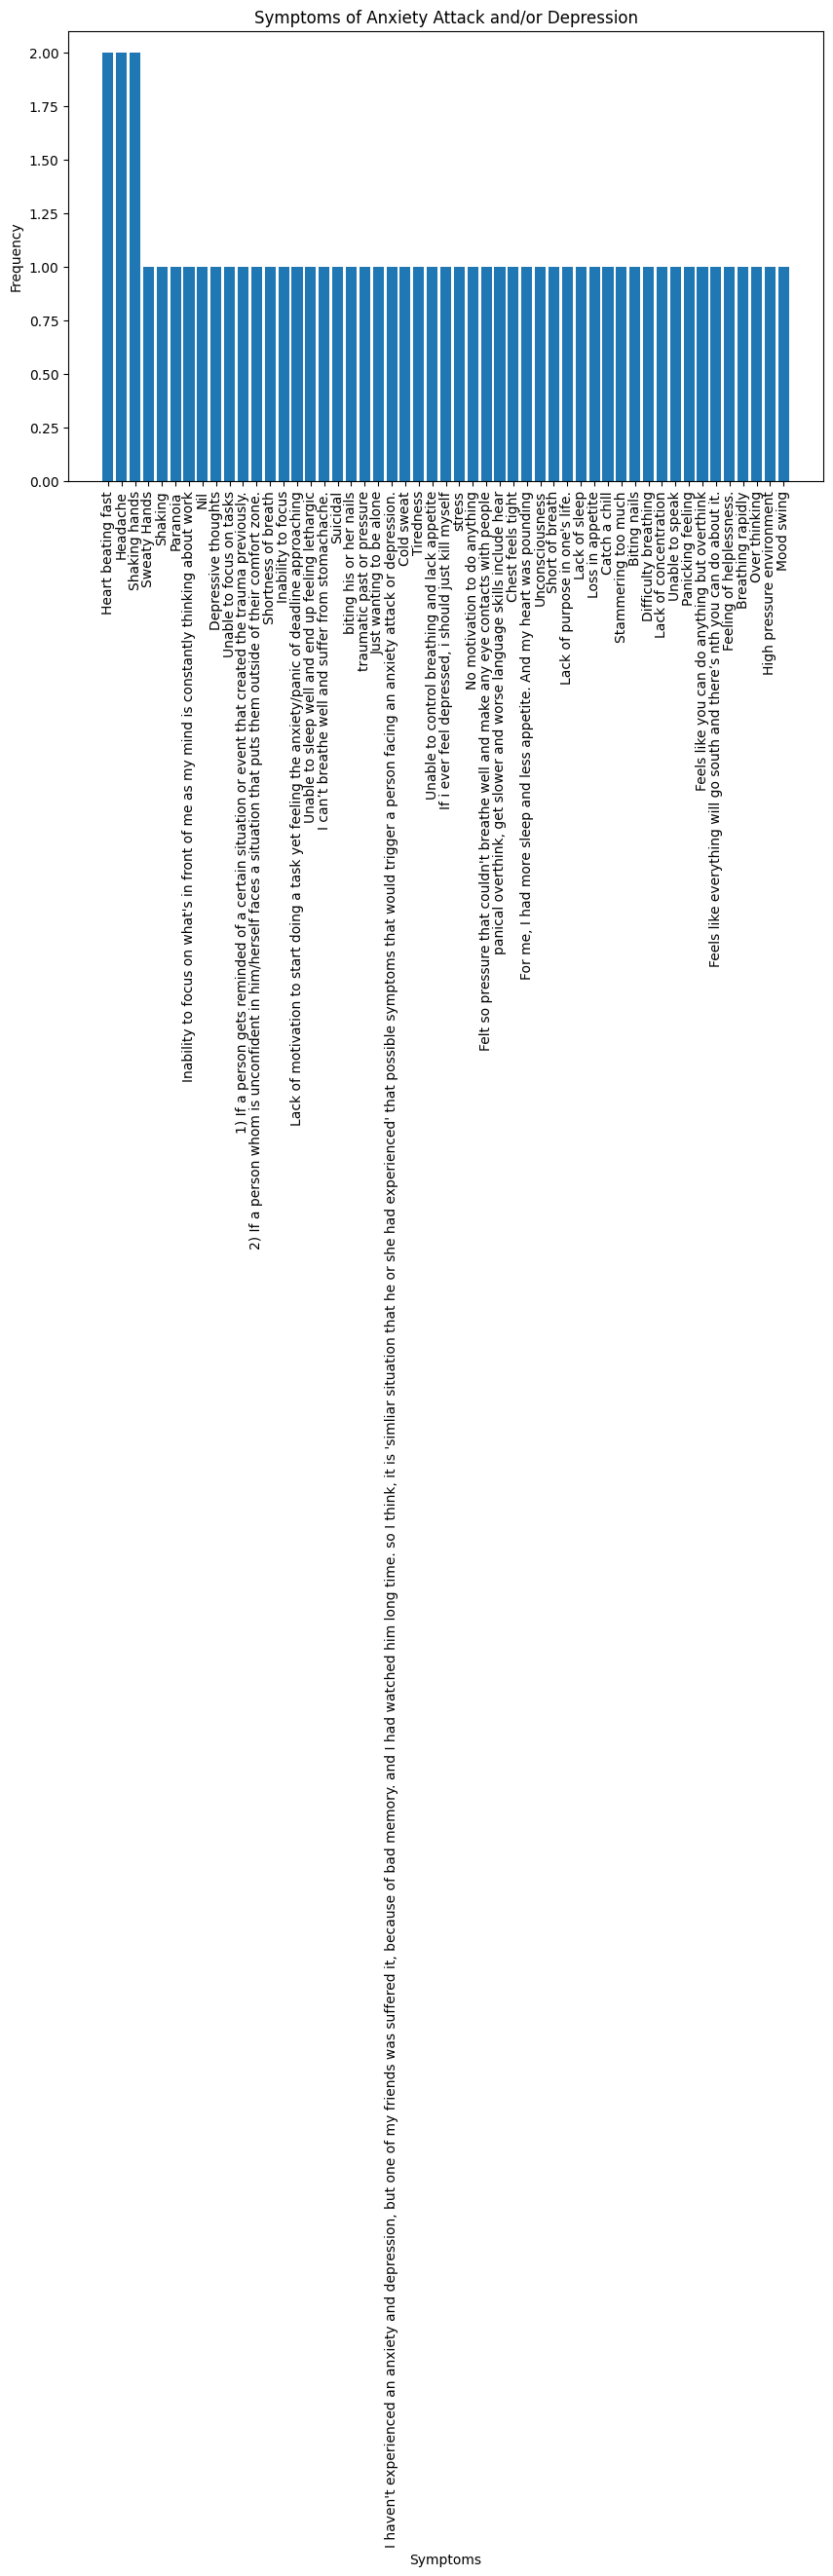

In [1]:
import matplotlib.pyplot as plt

# Survey answers
answers = [
    ["Sweaty Hands", "Shaking", "Paranoia"],
    ["Inability to focus on what's in front of me as my mind is constantly thinking about work"],
    ["Nil"],
    ["Depressive thoughts"],
    ["Unable to focus on tasks"],
    ["1) If a person gets reminded of a certain situation or event that created the trauma previously.",
     "2) If a person whom is unconfident in him/herself faces a situation that puts them outside of their comfort zone."],
    ["Shortness of breath", "Inability to focus", "Lack of motivation to start doing a task yet feeling the anxiety/panic of deadline approaching",
     "Unable to sleep well and end up feeling lethargic"],
    ["I can’t breathe well and suffer from stomachache."],
    ["Suicidal"],
    ["biting his or her nails"],
    ["traumatic past or pressure"],
    ["Just wanting to be alone"],
    ["I haven't experienced an anxiety and depression, but one of my friends was suffered it, because of bad memory. and I had watched him long time. so I think, it is 'simliar situation that he or she had experienced' that possible symptoms that would trigger a person facing an anxiety attack or depression."],
    ["Heart beating fast"],
    ["Headache", "Cold sweat", "Tiredness"],
    ["Unable to control breathing and lack appetite"],
    ["If i ever feel depressed, i should just kill myself"],
    ["stress"],
    ["No motivation to do anything"],
    ["Felt so pressure that couldn't breathe well and make any eye contacts with people"],
    ["panical overthink, get slower and worse language skills include hear"],
    ["Chest feels tight"],
    ["For me, I had more sleep and less appetite. And my heart was pounding"],
    ["Headache", "Unconsciousness"],
    ["Short of breath"],
    ["Lack of purpose in one's life."],
    ["Lack of sleep", "Loss in appetite"],
    ["Shaking hands", "Catch a chill"],
    ["Stammering too much", "Biting nails", "Shaking hands"],
    ["Difficulty breathing", "Lack of concentration"],
    ["Unable to speak"],
    ["Panicking feeling", "Heart beating fast", "Feels like you can do anything but overthink",
     "Feels like everything will go south and there’s nth you can do about it.", "Feeling of helplessness."],
    ["Breathing rapidly"],
    ["Over thinking"],
    ["High pressure environment"],
    ["Mood swing"]
]

# Count the frequency of each symptom/opinion
symptom_count = {}
for answer in answers:
    for symptom in answer:
        symptom_count[symptom] = symptom_count.get(symptom, 0) + 1

# Sort the symptoms by frequency in descending order
sorted_symptoms = sorted(symptom_count.items(), key=lambda x: x[1], reverse=True)
symptoms, counts = zip(*sorted_symptoms)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(symptoms, counts)
plt.xticks(rotation=90)
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.title('Symptoms of Anxiety Attack and/or Depression')
plt.tight_layout()
plt.show()


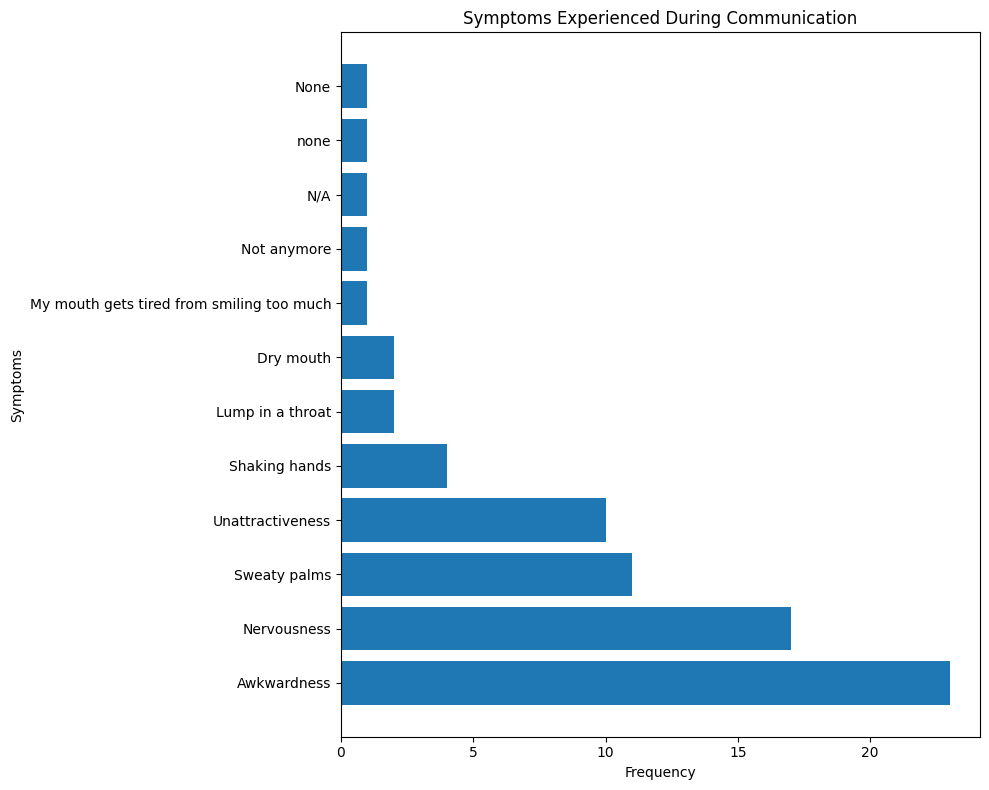

In [3]:
import matplotlib.pyplot as plt

# Survey answers
answers = [
    ["Lump in a throat", "Awkwardness", "Unattractiveness"],
    ["Nervousness"],
    ["My mouth gets tired from smiling too much"],
    ["Nervousness", "Awkwardness"],
    ["Sweaty palms"],
    ["Nervousness", "Awkwardness"],
    ["Sweaty palms", "Awkwardness"],
    ["Not anymore"],
    ["Sweaty palms", "Dry mouth"],
    ["Nervousness", "Awkwardness", "Unattractiveness"],
    ["Nervousness"],
    ["N/A"],
    ["Sweaty palms", "Nervousness", "Awkwardness"],
    ["Nervousness", "Awkwardness"],
    ["Sweaty palms", "Nervousness", "Awkwardness", "Unattractiveness"],
    ["none"],
    ["Sweaty palms", "Nervousness", "Awkwardness"],
    ["Sweaty palms", "Shaking hands", "Nervousness", "Awkwardness", "Unattractiveness"],
    ["Lump in a throat", "Nervousness", "Awkwardness", "Unattractiveness"],
    ["Dry mouth", "Awkwardness"],
    ["None"],
    ["Shaking hands", "Nervousness", "Awkwardness"],
    ["Shaking hands", "Awkwardness", "Unattractiveness"],
    ["Nervousness"],
    ["Unattractiveness"],
    ["Sweaty palms", "Awkwardness", "Unattractiveness"],
    ["Awkwardness"],
    ["Nervousness"],
    ["Sweaty palms", "Nervousness", "Awkwardness", "Unattractiveness"],
    ["Awkwardness"],
    ["Awkwardness", "Unattractiveness"],
    ["Awkwardness"],
    ["Sweaty palms", "Shaking hands", "Nervousness", "Awkwardness"],
    ["Nervousness", "Awkwardness"],
    ["Sweaty palms", "Awkwardness"]
]

# Count the frequency of each symptom
symptom_count = {}
for answer in answers:
    for symptom in answer:
        symptom_count[symptom] = symptom_count.get(symptom, 0) + 1

# Sort the symptoms by frequency in descending order
sorted_symptoms = sorted(symptom_count.items(), key=lambda x: x[1], reverse=True)
symptoms, counts = zip(*sorted_symptoms)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(symptoms, counts)
plt.xlabel('Frequency')
plt.ylabel('Symptoms')
plt.title('Symptoms Experienced During Communication')
plt.tight_layout()
plt.show()


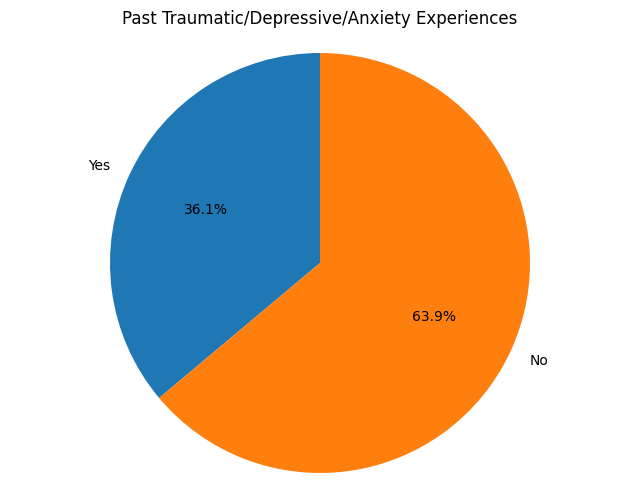

In [4]:
import matplotlib.pyplot as plt

# Survey responses
responses = [
    "No",
    "Yes",
    "No",
    "No",
    "No",
    "No",
    "Yes",
    "Yes",
    "Yes",
    "No",
    "Yes",
    "No",
    "No",
    "Yes",
    "No",
    "Yes",
    "No",
    "No",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "No",
    "No",
    "No",
    "No",
    "No",
    "No",
    "No",
    "No",
    "No",
    "Yes",
    "No",
    "Yes",
    "No",
    "No"
]

# Count the number of "Yes" and "No" responses
yes_count = responses.count("Yes")
no_count = responses.count("No")

# Create labels and sizes for the pie chart
labels = ["Yes", "No"]
sizes = [yes_count, no_count]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Past Traumatic/Depressive/Anxiety Experiences")
plt.show()


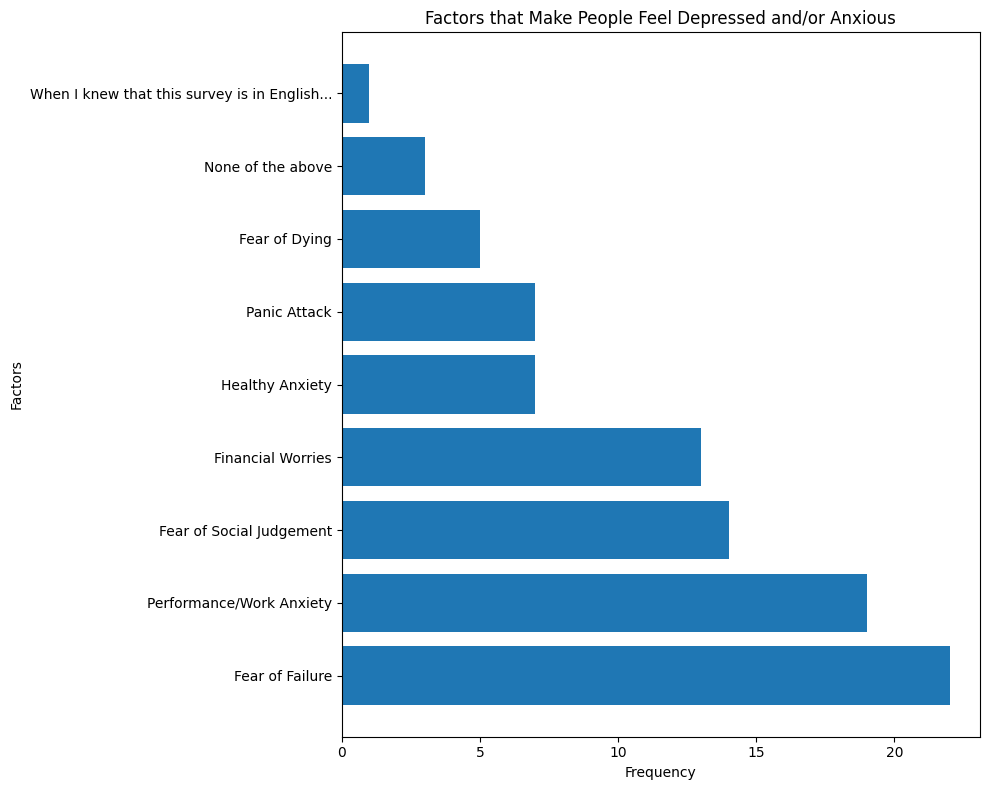

In [5]:
import matplotlib.pyplot as plt

# Survey responses
responses = [
    "Fear of Failure, Fear of Social Judgement, Financial Worries",
    "Fear of Failure, Performance/Work Anxiety",
    "None of the above",
    "Fear of Failure, Performance/Work Anxiety, Financial Worries",
    "Fear of Social Judgement, Performance/Work Anxiety",
    "Fear of Social Judgement, Healthy Anxiety, Financial Worries, Fear of Dying",
    "Fear of Failure, Performance/Work Anxiety",
    "Fear of Failure, Fear of Social Judgement, Performance/Work Anxiety",
    "Fear of Social Judgement",
    "Fear of Social Judgement, Healthy Anxiety",
    "Fear of Failure, Performance/Work Anxiety, Financial Worries",
    "Fear of Failure, Financial Worries",
    "Performance/Work Anxiety, When I knew that this survey is in English...",
    "Fear of Failure, Financial Worries",
    "Fear of Failure, Fear of Social Judgement, Performance/Work Anxiety, Healthy Anxiety, Financial Worries, Fear of Dying, Panic Attack",
    "Performance/Work Anxiety, Fear of Dying, Panic Attack",
    "None of the above",
    "Fear of Failure, Fear of Social Judgement, Performance/Work Anxiety",
    "Fear of Failure, Fear of Social Judgement, Performance/Work Anxiety",
    "Fear of Social Judgement",
    "Fear of Failure, Performance/Work Anxiety, Panic Attack",
    "Performance/Work Anxiety",
    "Performance/Work Anxiety, Healthy Anxiety, Panic Attack",
    "Fear of Failure, Financial Worries",
    "Fear of Failure, Performance/Work Anxiety, Financial Worries, Fear of Dying, Panic Attack",
    "None of the above",
    "Fear of Failure, Fear of Social Judgement, Performance/Work Anxiety",
    "Performance/Work Anxiety",
    "Fear of Failure, Healthy Anxiety",
    "Fear of Failure, Financial Worries, Fear of Dying",
    "Fear of Failure, Financial Worries",
    "Fear of Failure, Performance/Work Anxiety, Panic Attack",
    "Fear of Failure, Fear of Social Judgement, Performance/Work Anxiety, Financial Worries",
    "Fear of Social Judgement, Healthy Anxiety",
    "Fear of Failure",
    "Fear of Failure, Fear of Social Judgement, Healthy Anxiety, Financial Worries, Panic Attack"
]

# Count the frequency of each factor
factor_counts = {}
for response in responses:
    factors = response.split(", ")
    for factor in factors:
        factor_counts[factor] = factor_counts.get(factor, 0) + 1

# Sort the factors based on their frequency
sorted_factors = sorted(factor_counts.items(), key=lambda x: x[1], reverse=True)
factors = [factor[0] for factor in sorted_factors]
counts = [factor[1] for factor in sorted_factors]

# Create a horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(factors, counts)
plt.xlabel('Frequency')
plt.ylabel('Factors')
plt.title('Factors that Make People Feel Depressed and/or Anxious')
plt.tight_layout()
plt.show()

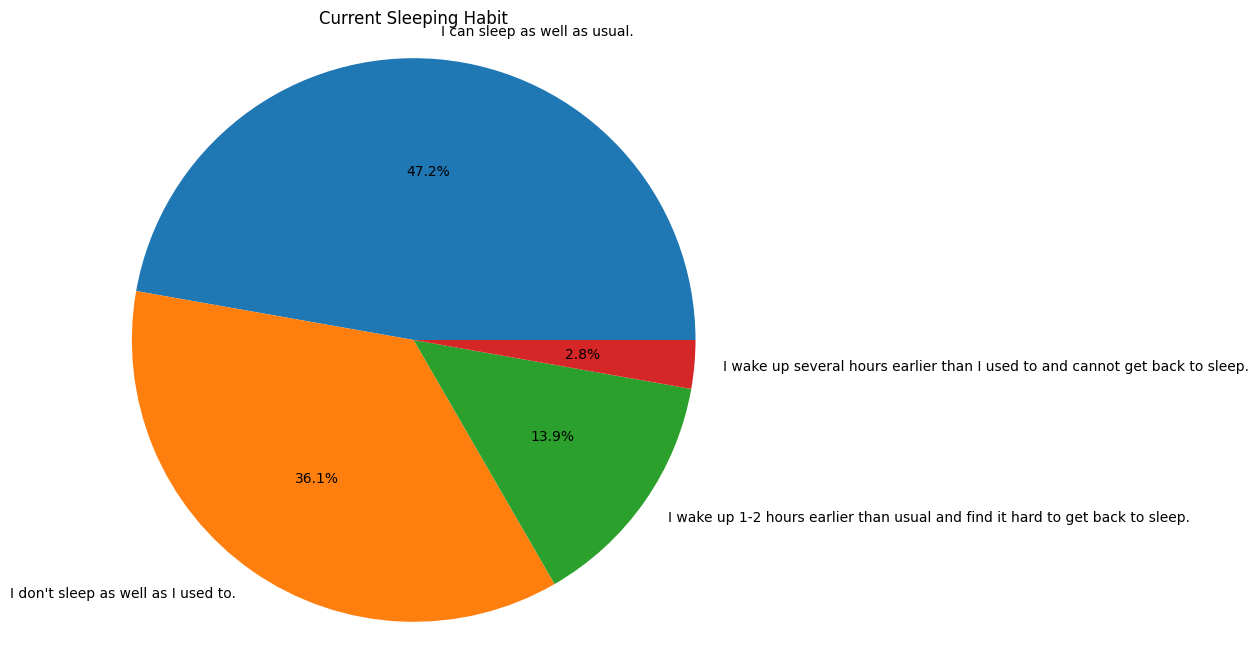

In [8]:
import matplotlib.pyplot as plt

# Survey responses
responses = [
    "I can sleep as well as usual.",
    "I don't sleep as well as I used to.",
    "I don't sleep as well as I used to.",
    "I wake up 1-2 hours earlier than usual and find it hard to get back to sleep.",
    "I don't sleep as well as I used to.",
    "I can sleep as well as usual.",
    "I don't sleep as well as I used to.",
    "I wake up 1-2 hours earlier than usual and find it hard to get back to sleep.",
    "I can sleep as well as usual.",
    "I can sleep as well as usual.",
    "I wake up 1-2 hours earlier than usual and find it hard to get back to sleep.",
    "I can sleep as well as usual.",
    "I can sleep as well as usual.",
    "I can sleep as well as usual.",
    "I don't sleep as well as I used to.",
    "I can sleep as well as usual.",
    "I can sleep as well as usual.",
    "I don't sleep as well as I used to.",
    "I can sleep as well as usual.",
    "I wake up 1-2 hours earlier than usual and find it hard to get back to sleep.",
    "I wake up several hours earlier than I used to and cannot get back to sleep.",
    "I don't sleep as well as I used to.",
    "I can sleep as well as usual.",
    "I don't sleep as well as I used to.",
    "I can sleep as well as usual.",
    "I can sleep as well as usual.",
    "I can sleep as well as usual.",
    "I wake up 1-2 hours earlier than usual and find it hard to get back to sleep.",
    "I can sleep as well as usual.",
    "I don't sleep as well as I used to.",
    "I can sleep as well as usual.",
    "I don't sleep as well as I used to.",
    "I don't sleep as well as I used to.",
    "I can sleep as well as usual.",
    "I don't sleep as well as I used to.",
    "I don't sleep as well as I used to."
]

# Count the frequency of each response
response_counts = {}
for response in responses:
    response_counts[response] = response_counts.get(response, 0) + 1

# Sort the responses based on their frequency
sorted_responses = sorted(response_counts.items(), key=lambda x: x[1], reverse=True)
responses = [response[0] for response in sorted_responses]
counts = [response[1] for response in sorted_responses]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=responses, autopct='%1.1f%%')
plt.title('Current Sleeping Habit')
plt.axis('equal')
plt.show()

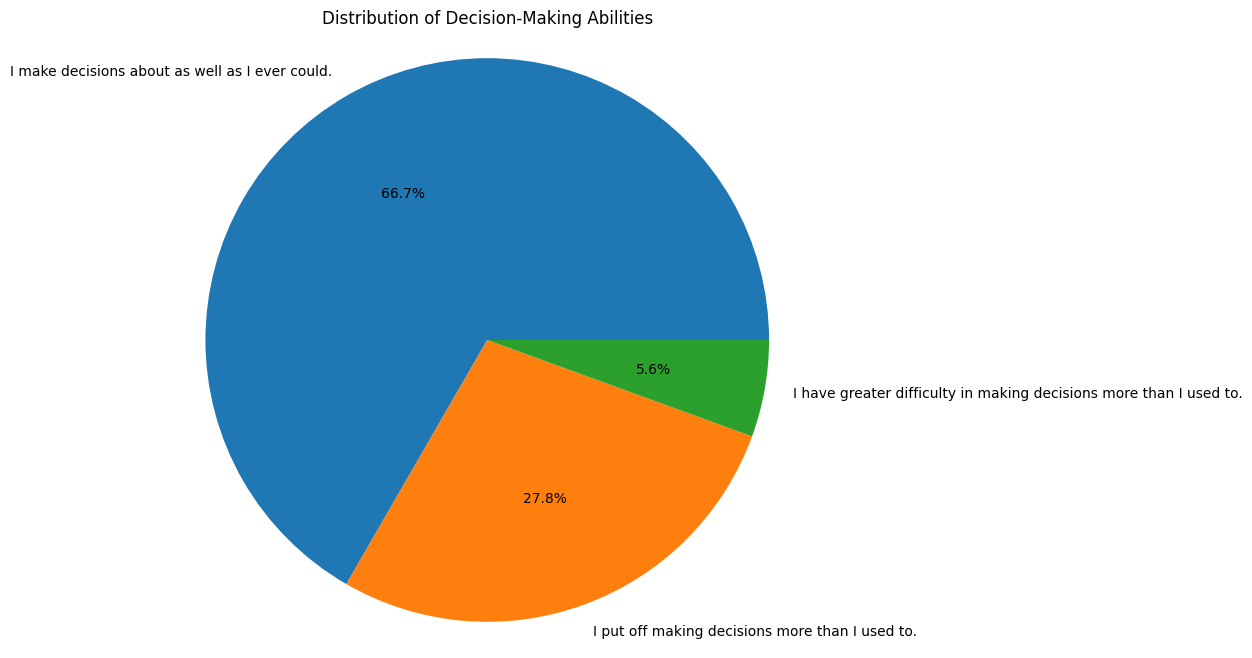

In [9]:
import matplotlib.pyplot as plt

# Survey responses
responses = [
    "I have greater difficulty in making decisions more than I used to.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I put off making decisions more than I used to.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I put off making decisions more than I used to.",
    "I put off making decisions more than I used to.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I put off making decisions more than I used to.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I put off making decisions more than I used to.",
    "I make decisions about as well as I ever could.",
    "I put off making decisions more than I used to.",
    "I put off making decisions more than I used to.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I put off making decisions more than I used to.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I make decisions about as well as I ever could.",
    "I put off making decisions more than I used to.",
    "I put off making decisions more than I used to.",
    "I have greater difficulty in making decisions more than I used to."
]

# Count the frequency of each response
response_counts = {}
for response in responses:
    response_counts[response] = response_counts.get(response, 0) + 1

# Sort the responses based on their frequency
sorted_responses = sorted(response_counts.items(), key=lambda x: x[1], reverse=True)
responses = [response[0] for response in sorted_responses]
counts = [response[1] for response in sorted_responses]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=responses, autopct='%1.1f%%')
plt.title('Distribution of Decision-Making Abilities')
plt.axis('equal')  # Ensure the pie is circular
plt.show()

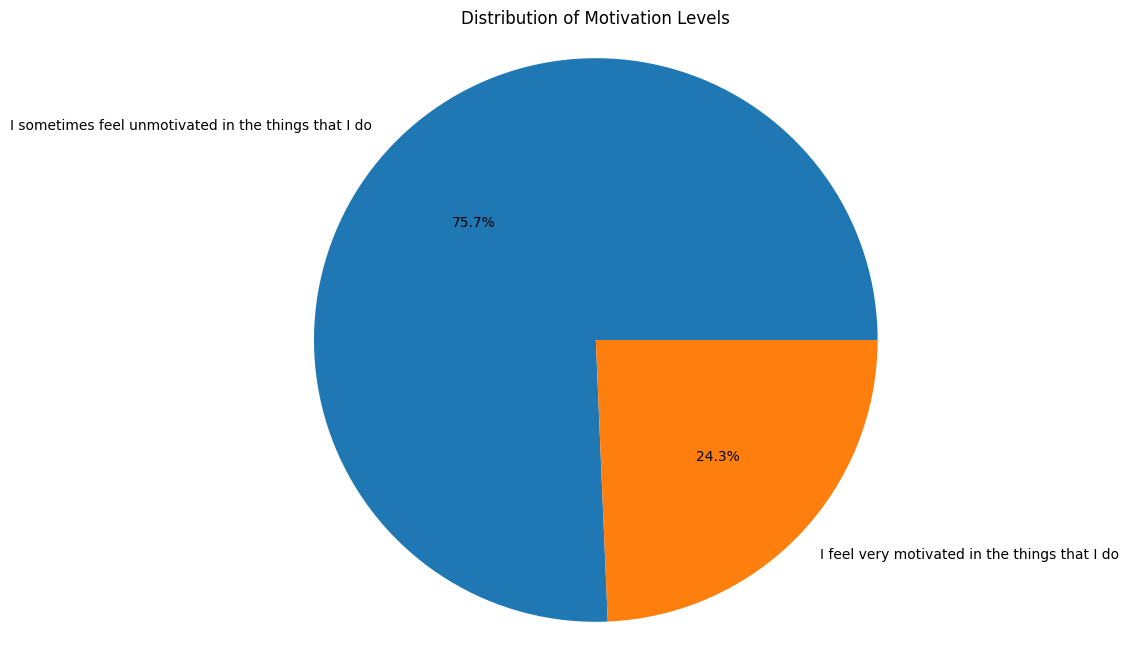

In [10]:
import matplotlib.pyplot as plt

# Survey responses
responses = [
    "I sometimes feel unmotivated in the things that I do",
    "I feel very motivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I feel very motivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I feel very motivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I feel very motivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I feel very motivated in the things that I do",
    "I feel very motivated in the things that I do",
    "I feel very motivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I feel very motivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I feel very motivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
    "I sometimes feel unmotivated in the things that I do",
]

# Count the frequency of each response
response_counts = {}
for response in responses:
    response_counts[response] = response_counts.get(response, 0) + 1

# Sort the responses based on their frequency
sorted_responses = sorted(response_counts.items(), key=lambda x: x[1], reverse=True)
responses = [response[0] for response in sorted_responses]
counts = [response[1] for response in sorted_responses]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=responses, autopct='%1.1f%%')
plt.title('Distribution of Motivation Levels')
plt.axis('equal')  # Ensure the pie is circular
plt.show()

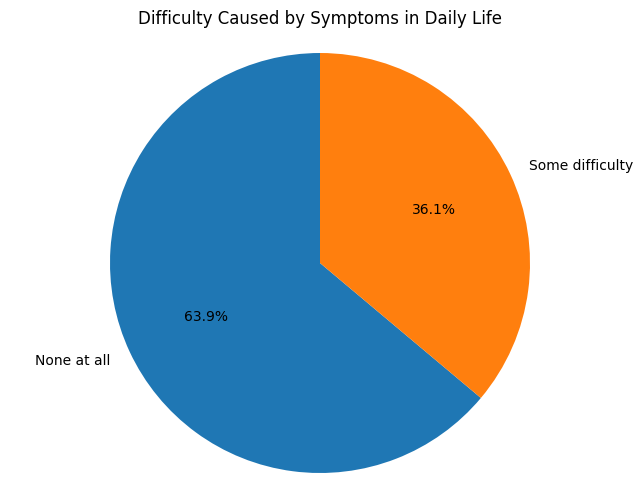

In [11]:
import matplotlib.pyplot as plt

# Survey responses
responses = [
    "Some difficulty",
    "None at all",
    "None at all",
    "None at all",
    "None at all",
    "None at all",
    "Some difficulty",
    "Some difficulty",
    "None at all",
    "None at all",
    "Some difficulty",
    "None at all",
    "None at all",
    "Some difficulty",
    "Some difficulty",
    "None at all",
    "None at all",
    "None at all",
    "None at all",
    "Some difficulty",
    "None at all",
    "None at all",
    "Some difficulty",
    "None at all",
    "None at all",
    "Some difficulty",
    "None at all",
    "None at all",
    "None at all",
    "Some difficulty",
    "None at all",
    "Some difficulty",
    "None at all",
    "Some difficulty",
    "None at all",
    "Some difficulty",
]

# Count the frequency of each response
response_counts = {}
for response in responses:
    response_counts[response] = response_counts.get(response, 0) + 1

# Sort the responses based on their frequency
sorted_responses = sorted(response_counts.items(), key=lambda x: x[1], reverse=True)
responses = [response[0] for response in sorted_responses]
counts = [response[1] for response in sorted_responses]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=responses, autopct='%1.1f%%', startangle=90)
plt.title('Difficulty Caused by Symptoms in Daily Life')
plt.axis('equal')
plt.show()

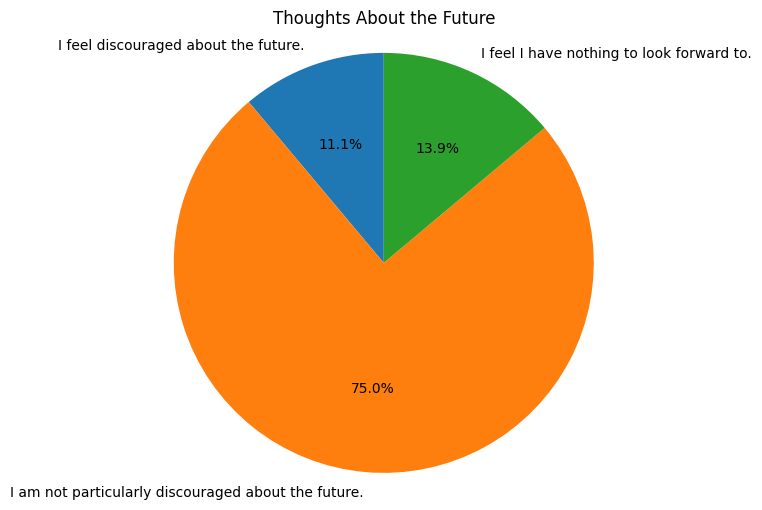

In [13]:
import matplotlib.pyplot as plt

# Survey responses
responses = [
    "I feel discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I feel I have nothing to look forward to.",
    "I feel I have nothing to look forward to.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I feel I have nothing to look forward to.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I feel I have nothing to look forward to.",
    "I feel discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I feel discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I feel discouraged about the future.",
    "I am not particularly discouraged about the future.",
    "I feel I have nothing to look forward to."
]

# Count the frequency of each response
response_counts = {}
for response in responses:
    response_counts[response] = response_counts.get(response, 0) + 1

# Convert the response counts into a list
counts = list(response_counts.values())

# Create labels for the pie chart
labels = list(response_counts.keys())

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Thoughts About the Future')
plt.axis('equal')
plt.show()